----

## Pendahuluan
Metode iterasi dengan titik tetap (fixed-point iteration) adalah salah satu metode yang digunakan pada analisis numerik, yang pada umumnya digunakan untuk menemukan akar dari suatu persamaan (matematika). Untuk metode mencari akar persamaan, pada analisis numerik, kita mengenal ada yang namanya bracketing method dan open method, metode iterasi dengan titik tetap ini merupakan metode terbuka. Metode fixed point dapat ditulis sebagai berikut.

Misalkan terdapat suatu fungsi $f:x \to y$ sehingga $y = f(x)$, maka untuk fungsi $f(x)$ dapat dituliskan ke dalam bentuk yang ekuivalen $\phi(x)$. Jika iterasi dilakukan sebanyak $i = 0, 1, ... , n - 1$ untuk $\phi_{i+1}(x) \equiv f_i(x)$, dengan dugaan inisial akarnya adalah $x_0$, maka untuk fungsi $\phi_(x_{i + 1})$ diperoleh
$$
(\phi \circ \phi \circ ... \circ \phi) (x) = \phi(\phi(...(\phi(x))...))
$$
dan untuk iterasi $i = 0, 1, ... , n - 1$, $\phi \circ \phi \circ ... \circ \phi : x_0 \to c$. Artinya, setelah melakukan iterasi ke $i_{th}$ diharapkan bahwa untuk nilai dugaan inisial akarnya $x_0$ akan konvergen ke nilai akar sebenarnya $c$.

Kita dapat menuliskan metode fixed point ke dalam bentuk algoritma berikut. Algoritma berikut mengembalikan vector $idsvect = (u_0, u_1, ... , u_{n-1})$

## Persoalan

**Latar Belakang.** Menentukan aliran fluida pada pipa dan selang mempunyai hubungan yang sangat erat di berbagai kalangan teknisi dan ilmuwan. Pada kalangan teknik, hal ini teraplikasikan pada aliran cairan dan gas yang melalui saluran pipa dan sistem pendingin. Sedangkan pada kalangan ilmuwan, aliran fluida teraplikasikan di berbagai topik, mulai dari aliran darah yang melalui pembuluh, hingga transmisi nutrisi pada tumbuhan.

Hambatan (resistance) pada aliran yang mengalir pada saluran diparameterkan oleh angka yang tak berdimensi (konstanta) yang disebut dengan faktor gesekan (friction factor). Untuk aliran turbulen, *persamaan Colebrook* memberikan rata - rata untuk menghitung kuantitas faktor gesekan:
$$
0 = \frac{1}{\sqrt{f}} + 2.0 \log \Bigg\{ \frac{\varepsilon}{3.7D} + \frac{2.51}{Re\sqrt{f}} \Bigg\}
$$
yang mana $\varepsilon = \text{tingkat kekasaran permukaan(m),}$ $D = \text{diameter(m),}$ dan $Re = \text{bilangan Reynold,}$ bilangan Reynold didefinisikan sebagai:
$$
Re = \frac{\rho V D}{\mu}
$$
yang mana $\rho = \text{massa jenis fluida }(kg/m^3)$, $V = \text{kecepatan (m),}$ dan $\mu = \text{viskositas dinamik}(N.s/m^2)$. Bilangan Reynold berguna untuk menentukan kriteria apakah alirannya merupakan bukan aliran turbulen atau turbulen $(Re > 4000)$

**Masalah.** Pada studi kasus ini, kita akan mengilustrasikan metode analisis numerik, *simple fixed-point iteration* menyelesaikan masalah untuk menentukan friction factor $f$ pada aliran udara melalui selang yang tipis dan halus. Untuk kasus kali ini, parameternya adalah $\rho = 1.23kg/m^3$, $\mu = 1.79 \times 10{-5} N.s/m^2$, $D = 0.005m$, $V = 40 m/s$ dan $\varepsilon = 0.0015mm$. Perlu dicatat bahwa interval friction factor f-nya sekitar 0.008 hingga 0.08. Sebagai tambahan, persamaan eksplisit untuk menentukan friction factor f dikenal dengan *persamaan Swamee-Jain* menyediakan approksimasi estimasi bahwa $f$ didefinisikan oleh:
$$
f = \frac{1.325}{ \Bigg[ \ln \Bigg\{\frac{\varepsilon}{3.7D} + \frac{5.74}{Re^{0.9}} \Bigg\} \Bigg]^2}
$$

**Penyelesaian.**
Pertama, komputasikan nilai dari bilangan Reynoldnya dengan menggunakan persamaan berikut,
$$
Re = \frac{\rho V D}{\mu}
$$
Dengan memasukkan nilai $\rho = 1.23kg/m^3$, $V = 40 m/s$, $D = 0.005m$, dan $\mu = 1.79 \times 10{-5} N.s/m^2$, diperoleh,
$$
Re = \frac{\rho V D}{\mu} = \frac{1.23 \times 40 \times 0.005}{1.79 \times 10^{-5}} = 13743.02 \approx 13743
$$

In [6]:
% Compute the Reynold's number
RHO = 1.23; VELOCITY = 40; DIAMETER = 0.005; MU = 0.0000179;
RE = RHO * VELOCITY * DIAMETER / MU

RE = 1.3743e+04


Tulis kembali *persamaan Colebrook* untuk $f$ sehingga,
$$
\begin{aligned}
0 &= \frac{1}{\sqrt{f}} + 2.0 \log \Bigg\{ \frac{\varepsilon}{3.7D} + \frac{2.51}{Re\sqrt{f}} \Bigg\} \\
0 &=  \frac{1}{\sqrt{f}} + 2.0 \log \Bigg\{ \frac{0.0000015}{3.7\times 0.005} + \frac{2.51}{13743 \times\sqrt{f}} \Bigg\} \\
f &= \frac{0.25}{\Bigg(\log\Bigg(\frac{0.0000015}{3.7\times 0.005} + \frac{2.51}{13743 \times\sqrt{f}}\Bigg)\Bigg)^2}
\end{aligned}
$$

In [8]:
% Compute function of f
function[friction] = phi(xreal)
STCONSTANT = 0.0000015 / (3.7 * 0.005);
NDCONSTANT = 2.51 / 13743;
logterm = log10(STCONSTANT + (NDCONSTANT * 1 / sqrt(xreal)));
friction = 0.25 * 1 / (logterm ** 2);
end

In [23]:
% Compute several value of f
for i = 0.01:0.01:0.09
    sprintf('phi(%f) = %f', i, phi(i))
end

ans = phi(0.010000) = 0.033802
ans = phi(0.020000) = 0.030511
ans = phi(0.030000) = 0.028829
ans = phi(0.040000) = 0.027732
ans = phi(0.050000) = 0.026931
ans = phi(0.060000) = 0.026308
ans = phi(0.070000) = 0.025802
ans = phi(0.080000) = 0.025379
ans = phi(0.090000) = 0.025017


In [17]:
% Compute function fixed-point iteration
function [xvect, fepsilonar] = fixedpoint(x0, niteration)
ids = x0;
fepsilonar = 0;
xvect = [];
for i = 1:niteration-1
    ids = feval('phi', ids);
    xvect(i) = ids;
    if (i > 1) 
        fepsilonar(i) = abs((xvect(i) - xvect(i - 1)) / xvect(i));
    end
end
end

Sehingga, untuk $x_0 = 0.01$ dengan iterasi $i = 0, 1, ... , 15$, diperoleh.

In [38]:
[xvect, fepsilonar] = fixedpoint(0.01, 15)

xvect =

 Columns 1 through 7:

   0.033802   0.028365   0.029052   0.028956   0.028969   0.028968   0.028968

 Columns 8 through 14:

   0.028968   0.028968   0.028968   0.028968   0.028968   0.028968   0.028968

fepsilonar =

 Columns 1 through 8:

        0   0.1917   0.0237   0.0033   0.0005   0.0001   0.0000   0.0000

 Columns 9 through 14:

   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000



Terlihat bahwa untuk $x_0 = 0.001$ dengan iterasi $i = 0, 1, ... , 15 - 1$, nilai friction factor $f$ konvergen ke $0.028968$ dengan estimasi kesalahannya (error estimation) $\varepsilon_a = 0.01%$ pada **fepsilonar(6).** Hal ini membuktikan bahwa dengan menggunakan analisis numerik metode fixed-point iteration, friction factor $f$ konvergen dengan cepat menuju nilai 0.028968. Dengan demikian, nilai friction factor $f$-nya adalah 0.028968. 

Berikut adalah plot dari fungsi friction factor f dan pola konvergennya.

In [123]:
graphics_toolkit % What is the grpahics toolkits being used

ans = gnuplot


In [124]:
graphics_toolkit("gnuplot") % use gnuplot as the graphics toolkit

In [125]:
graphics_toolkit % What is the grpahics toolkits being used

ans = gnuplot


In [126]:
%Define the domain of x-axis
xdomain = 0.01:0.001:0.09;
phivect = [];
for i = xdomain
    phivect = [phivect, phi(i)];
end
stiter = [];
for i = 0.01:0.001:phi(0.01)
    stiter = [stiter, phi(0.01)];
end

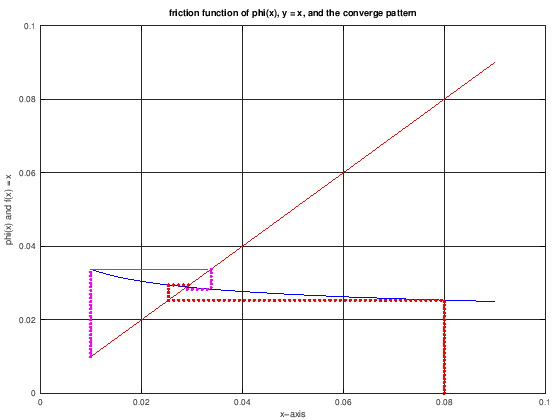

In [130]:
%Plot the function phi(x), y = x, and the converge pattern for x0 = 0.01 and x0 = 0.08
plot(xdomain, phivect, 'b', xdomain, xdomain, 'r-', 
    0.01, 0.01:0.001:phi(0.01), 'm',
    0.01:0.001:phi(0.01), stiter, 'm',
    phi(0.01), phi(0.01):-0.001:phi(phi(0.01)), 'm',
    phi(phi(phi(0.01))):0.001:phi(0.01), phi(phi(0.01)), 'm',
    0.08, 0:0.001:phi(0.08),  'r',
    phi(0.08):0.001:0.08, phi(0.08),  'r',
    phi(0.08), phi(0.08):0.001:phi(phi(0.08)),  'r',
    phi(0.08):0.001:phi(phi(0.08)), phi(phi(0.08)), 'r')
grid on
title('friction function of phi(x), y = x, and the converge pattern')
xlabel('x-axis')
ylabel('phi(x) and f(x) = x')

Dari grafik tersebut, grafik berwarna biru merupakan grafik dari fungsi friction factor f phi(x), warna merah merupakan grafik dari fungsi linear $y = x$ dan garis putus-putus dengan warna ungu merupakan pola konvergen untuk inisial nilai $x_0 = 0.01$ dan garis putus-putus berwarna merah merupakan pola konvergen untuk inisial nilai $x_0 = 0.08$. Terlihat bahwa hanya dengan 3 iterasi saja, nilai friction factor $f$ sudah mulai konvergen.

**Masalah.** Tentukan akar dari persamaan berikut dengan dugaan inisial akarnya $x_0 = 0.5$
$$
f(x) = sin(\sqrt{x}) - x
$$

**Penyelesaian.** Untuk $f(x) = 0$, kita dapat menuliskan persamaan ini dengan bentuk
$$
x = sin(\sqrt{x})
$$
Sehingga diperoleh 2 bentuk persamaan yang ekuivalen, yaitu $\phi_1(x) = x$ dan $\phi_2(x) = sin(\sqrt{x})$. Secara intuisi, untuk persamaan $\phi_1(x) = x$ merupakan persamaan linear, dan persamaan linear akan memberikan hasil divergent (tidak konvergen) untuk iterasi ke n. Maka dari itu, kita pilih persamaan $\phi_2(x) = sin(\sqrt{x})$

In [147]:
% Compute function fixed-point iteration
function [xvect, fepsilonar] = fixedpointsin(x0, niteration)
ids = x0;
fepsilonar = 0;
xvect = [];
for i = 1:niteration-1
    ids = sin(sqrt(ids));
    xvect(i) = ids;
    if (i > 1) 
        fepsilonar(i) = abs((xvect(i) - xvect(i - 1)) / xvect(i));
    end
end
end

In [149]:
% Compute several value of f
for i = 0.5:0.1:0.9
    sprintf('sin(sqrt(%f)) = %f', i, sin(sqrt(i)))
end

ans = sin(sqrt(0.500000)) = 0.649637
ans = sin(sqrt(0.600000)) = 0.699428
ans = sin(sqrt(0.700000)) = 0.742410
ans = sin(sqrt(0.800000)) = 0.779851
ans = sin(sqrt(0.900000)) = 0.812649


Sehingga, untuk iterasi $i = 0, 1, ... 20 - 1$ dengan inisial akarnya $x_0 = 0.5$ diperoleh,

In [151]:
[xvect, fepsilonar] = fixedpointsin(0.6, 15)

xvect =

 Columns 1 through 8:

   0.6994   0.7422   0.7588   0.7650   0.7673   0.7682   0.7685   0.7686

 Columns 9 through 14:

   0.7686   0.7686   0.7686   0.7686   0.7686   0.7686

fepsilonar =

 Columns 1 through 7:

          0   0.057604   0.021928   0.008130   0.002984   0.001091   0.000398

 Columns 8 through 14:

   0.000145   0.000053   0.000019   0.000007   0.000003   0.000001   0.000000



Terlihat bahwa nilainya mulai konvergen pada iterasi ke 8, hal ini dapat dilihat pada nilai **xvect(8) = 0.7686** dengan nilai $\varepsilon_a = 0.000145$.

Berikut adalah plot dari fungsi linear $\phi(x) = x$ dan fungsi $\phi(x) = sin(\sqrt{x})$

In [152]:
% Compute the domain of x-axis
xdosin = 0.0:0.001:0.9;
linearfun = xdosin;
trigfun = sin(sqrt(xdosin));

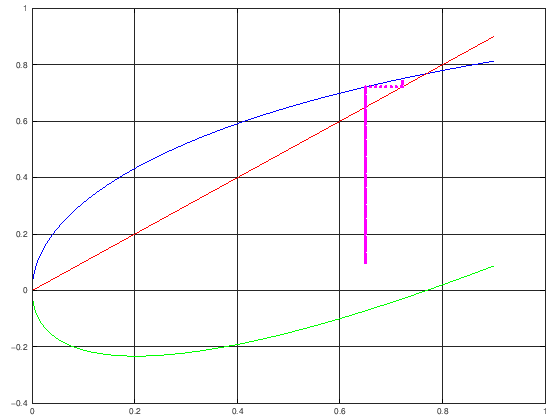

In [184]:
plot(xdosin, trigfun, 'b', xdosin, linearfun, 'r-', xdosin, xdosin - sin(sqrt(xdosin)), 'g',
    sin(sqrt(0.5)),0.1:0.01:sin(sqrt(sin(sqrt(0.5)))),  'm',
    sin(sqrt(0.5)):0.01:sin(sqrt(sin(sqrt(0.5)))), sin(sqrt(sin(sqrt(0.5)))), 'm',
    sin(sqrt(sin(sqrt(0.5)))), sin(sqrt(sin(sqrt(0.5)))):0.01:sin(sqrt(sin(sqrt(sin(sqrt(0.5)))))), 'm')
grid on

Dari grafik tersebut, grafik yang mau dicari akarnya adalah grafik berwarna hijau, grafik berwarna biru merupakan grafik dari $\phi(x) = sin(\sqrt{x})$, warna merah merupakan grafik dari fungsi linear $y = x$ dan garis putus-putus dengan warna ungu merupakan pola konvergen untuk inisial nilai $x_0 = 0.5$. Tidak seperti contoh sebelumnya, untuk kasus kali ini, kita akan jumpai akar dari persamaan $f(x) = x + sin(\sqrt{x})$ pada iterasi ke 11, dengan nilai 0.7686.

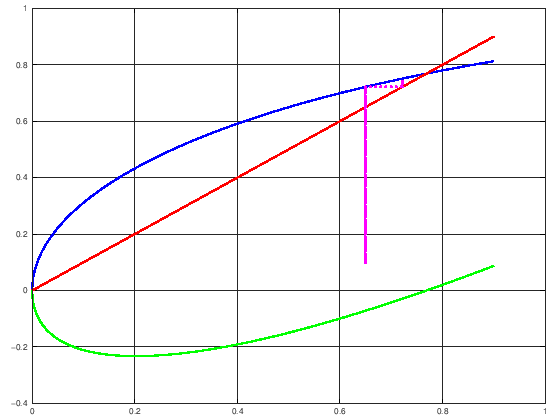

In [185]:
plot(xdosin, trigfun, 'b', 'LineWidth', 5, xdosin, linearfun, 'r-', 'LineWidth', 5, xdosin, xdosin - sin(sqrt(xdosin)), 'g', 'LineWidth', 5,
    sin(sqrt(0.5)),0.1:0.01:sin(sqrt(sin(sqrt(0.5)))),  'm', 'LineWidth', 5,
    sin(sqrt(0.5)):0.01:sin(sqrt(sin(sqrt(0.5)))), sin(sqrt(sin(sqrt(0.5)))), 'm', 'LineWidth', 5,
    sin(sqrt(sin(sqrt(0.5)))), sin(sqrt(sin(sqrt(0.5)))):0.01:sin(sqrt(sin(sqrt(sin(sqrt(0.5)))))), 'm', 'LineWidth', 5)
grid on